<a href="https://colab.research.google.com/github/aruaru0/tabnet-test/blob/main/tabnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# インストール

In [1]:
!pip install pytorch-tabnet

# ライブラリのインポート

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer

import torch

## データの作成

In [3]:
X, y = make_classification(n_samples=10000,
                           n_features=10,
                           n_redundant = 3,
                           n_informative = 5,
                           n_classes=2,
                           random_state=42)

In [4]:
df = pd.DataFrame(X)
df['target'] = y
df.head(20)

,0,1,2,3,4,5,6,7,8,9,target
0,0.261758,0.392731,-0.808093,-1.848465,1.222284,1.803318,2.896824,-0.346674,-1.214386,-2.812468,0
1,-0.114392,-0.748236,-0.634377,-0.288498,1.023028,0.367244,0.051039,1.270733,0.622655,-0.256778,0
2,0.312028,-1.492304,-0.711194,0.173962,1.066032,0.183943,-0.046342,-1.260676,-0.278665,-0.392808,0
3,0.487602,-0.897590,-0.970713,-1.513267,2.705609,2.617096,2.539888,0.348632,0.029463,-3.403255,0
4,0.901587,-0.144531,1.226887,0.285266,3.836804,3.400022,-0.721368,1.370580,-0.094590,-2.163323,1
5,-1.512935,0.839964,-2.394045,-3.220995,0.166090,0.238969,3.056046,-0.654477,-0.908181,-0.925463,0
6,2.482120,-0.753017,-1.266062,0.515353,2.765119,-0.500146,-1.782607,-0.286599,1.539449,0.554886,0
7,-2.288275,-1.994036,-1.838359,-0.860530,0.123930,-0.651246,0.128080,0.261330,1.306397,1.081350,0
8,0.343655,-0.929279,0.120875,1.019661,0.090647,-0.577260,-1.235540,2.338216,-0.026320,0.787484,0
9,1.747647,1.073376,2.324566,1.597653,1.902705,1.679127,-2.231188,0.273718,-1.536220,-0.421791,1


In [5]:

train_rate, val_rate, test_rate = 0.7, 0.15, 0.15

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_rate, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=test_rate/(test_rate+val_rate), random_state=42)

In [6]:
len(X_train), len(X_valid), len(X_test)

(7000, 1500, 1500)

# TabNetを使って予測

## 事前学習

In [7]:
unsupervised_model = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax'
)

unsupervised_model.fit(
    X_train=X_train,
    eval_set=[X_valid],
    pretraining_ratio=0.8,
    max_epochs = 100,
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.98879 | val_0_unsup_loss_numpy: 1.4636800289154053|  0:00:00s
epoch 1  | loss: 1.16293 | val_0_unsup_loss_numpy: 1.066640019416809|  0:00:01s
epoch 2  | loss: 1.03527 | val_0_unsup_loss_numpy: 0.9839100241661072|  0:00:01s
epoch 3  | loss: 1.00156 | val_0_unsup_loss_numpy: 0.956309974193573|  0:00:01s
epoch 4  | loss: 0.9737  | val_0_unsup_loss_numpy: 0.9258900284767151|  0:00:02s
epoch 5  | loss: 0.95633 | val_0_unsup_loss_numpy: 0.8822600245475769|  0:00:03s
epoch 6  | loss: 0.94677 | val_0_unsup_loss_numpy: 0.8386800289154053|  0:00:03s
epoch 7  | loss: 0.9276  | val_0_unsup_loss_numpy: 0.790690004825592|  0:00:05s
epoch 8  | loss: 0.91786 | val_0_unsup_loss_numpy: 0.7493000030517578|  0:00:05s
epoch 9  | loss: 0.89104 | val_0_unsup_loss_numpy: 0.7110599875450134|  0:00:06s
epoch 10 | loss: 0.89177 | val_0_unsup_loss_numpy: 0.6906800270080566|  0:00:07s
epoch 11 | loss: 0.86912 | val_0_unsup_loss_numpy: 0.6548200249671936|  0:00:08s
epoch 12 | loss: 0.87086 | val_

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


## 学習

In [8]:
tabnet_params = {
                 "optimizer_fn":torch.optim.Adam,
                 "optimizer_params":dict(lr=2e-2),
                 "scheduler_params":{"step_size":50, # how to use learning rate scheduler
                                 "gamma":0.9},
                 "scheduler_fn":torch.optim.lr_scheduler.StepLR,
                 "mask_type":'entmax',
                 }

clf = TabNetClassifier(**tabnet_params
                      )

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [9]:
max_epochs = 20

In [10]:
# from pytorch_tabnet.augmentations import ClassificationSMOTE
# aug = ClassificationSMOTE(p=0.2)

In [11]:
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    max_epochs=max_epochs , patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    augmentations=None,
    from_unsupervised=unsupervised_model
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.63144 | train_auc: 0.82318 | valid_auc: 0.82092 |  0:00:00s
epoch 1  | loss: 0.38146 | train_auc: 0.88355 | valid_auc: 0.88751 |  0:00:01s
epoch 2  | loss: 0.26928 | train_auc: 0.9151  | valid_auc: 0.91281 |  0:00:01s
epoch 3  | loss: 0.24347 | train_auc: 0.93506 | valid_auc: 0.92801 |  0:00:02s
epoch 4  | loss: 0.19932 | train_auc: 0.95881 | valid_auc: 0.95796 |  0:00:02s
epoch 5  | loss: 0.19286 | train_auc: 0.95787 | valid_auc: 0.953   |  0:00:03s
epoch 6  | loss: 0.17665 | train_auc: 0.96217 | valid_auc: 0.96149 |  0:00:03s
epoch 7  | loss: 0.1759  | train_auc: 0.97506 | valid_auc: 0.97294 |  0:00:04s
epoch 8  | loss: 0.16788 | train_auc: 0.97338 | valid_auc: 0.97047 |  0:00:04s
epoch 9  | loss: 0.15998 | train_auc: 0.97976 | valid_auc: 0.97753 |  0:00:05s
epoch 10 | loss: 0.15735 | train_auc: 0.97699 | valid_auc: 0.97356 |  0:00:05s
epoch 11 | loss: 0.15171 | train_auc: 0.98259 | valid_auc: 0.97899 |  0:00:06s
epoch 12 | loss: 0.14816 | train_auc: 0.97924 | vali

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


## 予測

In [12]:
preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)


preds_valid = clf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid[:,1], y_true=y_valid)

print("valid_auc = ", valid_auc)
print("test_auc = ", test_auc)

valid_auc =  0.9851784018450686
test_auc =  0.9864709407043504


feature 9 : 0.2850628122941535
feature 5 : 0.16348304202670996
feature 0 : 0.14779516687246716
feature 3 : 0.1265401265637643
feature 2 : 0.07739413530142895
feature 6 : 0.0680603533275236
feature 1 : 0.06336122861362507
feature 4 : 0.043713949430405824
feature 8 : 0.023770800553614642
feature 7 : 0.00081838501630697


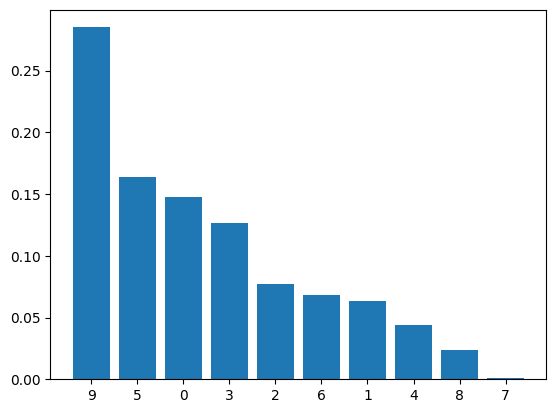

In [13]:
importance = sorted([(i, n) for i, n in enumerate(clf.feature_importances_)], key = lambda x: x[1], reverse = True)
label, y = [], []
for e in importance:
  print(f"feature {e[0]} : {e[1]}")
  label.append(e[0])
  y.append(e[1])

plt.bar([i for i in range(len(y))], y, tick_label = label)
plt.show()

## LightGBMを使って予測

## 学習

In [14]:
from lightgbm import LGBMClassifier

lgb_params = {
  'n_estimators': 10000,
  'learning_rate': 0.05,
  'random_state': 42,
  'early_stopping_round': 20,
  'metric': 'auc'
}

lgb = LGBMClassifier(**lgb_params)
lgb.fit(X_train, y_train, eval_set=[(X_valid, y_valid)])

[LightGBM] [Info] Number of positive: 3447, number of negative: 3553
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000926 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492429 -> initscore=-0.030288
[LightGBM] [Info] Start training from score -0.030288
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[264]	valid_0's auc: 0.983045


LGBMClassifier(early_stopping_round=20, learning_rate=0.05, metric='auc',
               n_estimators=10000, random_state=42)

## 予測

In [15]:
preds = lgb.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)


preds_valid = lgb.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid[:,1], y_true=y_valid)

print("valid_auc = ", valid_auc)
print("test_auc = ", test_auc)

valid_auc =  0.9830452198873252
test_auc =  0.9846662363824835


feature 0 : 1258
feature 1 : 1249
feature 4 : 1061
feature 6 : 946
feature 2 : 859
feature 5 : 610
feature 3 : 582
feature 9 : 488
feature 8 : 478
feature 7 : 389


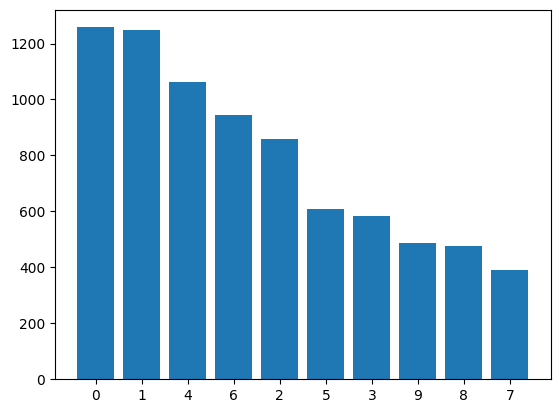

In [18]:
importance = sorted([(i, n) for i, n in enumerate(lgb.feature_importances_)], key = lambda x: x[1], reverse = True)
label, y = [], []
for e in importance:
  print(f"feature {e[0]} : {e[1]}")
  label.append(e[0])
  y.append(e[1])

plt.bar([i for i in range(len(y))], y, tick_label = label)
plt.show()